In [110]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
cData = pd.read_csv("vehicle.csv")
cData.shape

(846, 19)

In [3]:
cData.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [4]:
cData.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

### By looking at the describe table i can see a total value are 846 with all the attributes having a missing value leaving 4 attributes.Scaled variance, radius ratio, aspect ratio, scaled_variance, skewness_about could have outliers

### Understanding the data

In [6]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
#before applying all the median values dealing with the only categorical variable in the dataset i.e class column
replaceData = {"class" :{"van":1, "car":2, "bus":3}} #replacing the categorical data with the numbers
cData = cData.replace(replaceData)

In [10]:
cData.describe() #dealt with the categorical variable

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        845.000000     846.000000  846.000000  
mean         188.919527     195.632388    2.022459  
std            6.155809       7.438797    0.702130  
min          176.000000     181.000000    1.000000  
25%          184.000000     190.250000    2.000000  
50%          188.000000     197.000000    2.000000  
75%          193.000000     201.000000    3.000000  
max          206.000000     211.000000    3.000000

In [13]:
medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller, axis=0)
cData.head(20) #filling all the missing data with median value 

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107         44.0                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0         167.0   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                  61.0                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

### Working with outliers using the zscore

In [15]:
z = np.abs(stats.zscore(cData))
print(z)

[[0.16058035 0.51807313 0.05717723 ... 0.31201194 0.18395733 1.45708611]
 [0.32546965 0.62373151 0.12074088 ... 0.01326483 0.45297703 1.45708611]
 [1.25419283 0.84430302 1.51914112 ... 0.14937355 0.04944748 0.03200536]
 ...
 [1.49721783 1.49676282 1.20132288 ... 0.31201194 0.72199673 0.03200536]
 [0.93303214 1.43930625 0.26064101 ... 0.17590322 0.08506238 0.03200536]
 [1.05454464 1.43930625 1.02340478 ... 0.47465032 0.75761164 1.45708611]]


In [16]:
#defining threshold
threshold = 3
print(np.where(z>3))

(array([  4,   4,   4,  37,  37,  37,  37,  44,  85, 100, 100, 100, 123,
       132, 135, 135, 135, 135, 291, 291, 321, 321, 388, 388, 388, 388,
       388, 391, 396, 513, 516, 523, 523, 623, 687, 687, 706, 706, 706,
       733, 761, 835, 835, 835], dtype=int64), array([ 4,  5, 13,  3,  4,  5, 13,  0, 11,  4,  5, 13, 14, 15,  3,  4,  5,
       13,  4,  5, 10, 11,  3,  4,  5, 10, 13,  5, 10, 15, 14,  4,  5, 14,
       10, 11,  4,  5, 13, 10, 14,  8, 10, 11], dtype=int64))


In [18]:
cData.shape

(846, 19)

In [19]:
cData = cData[(z<3).all(axis=1)] #applying the zscore and removing the outliers where the score is more than 3

In [21]:
cData.shape #we can see 22 data points have been removed

(824, 19)

## Understanding the attributes 

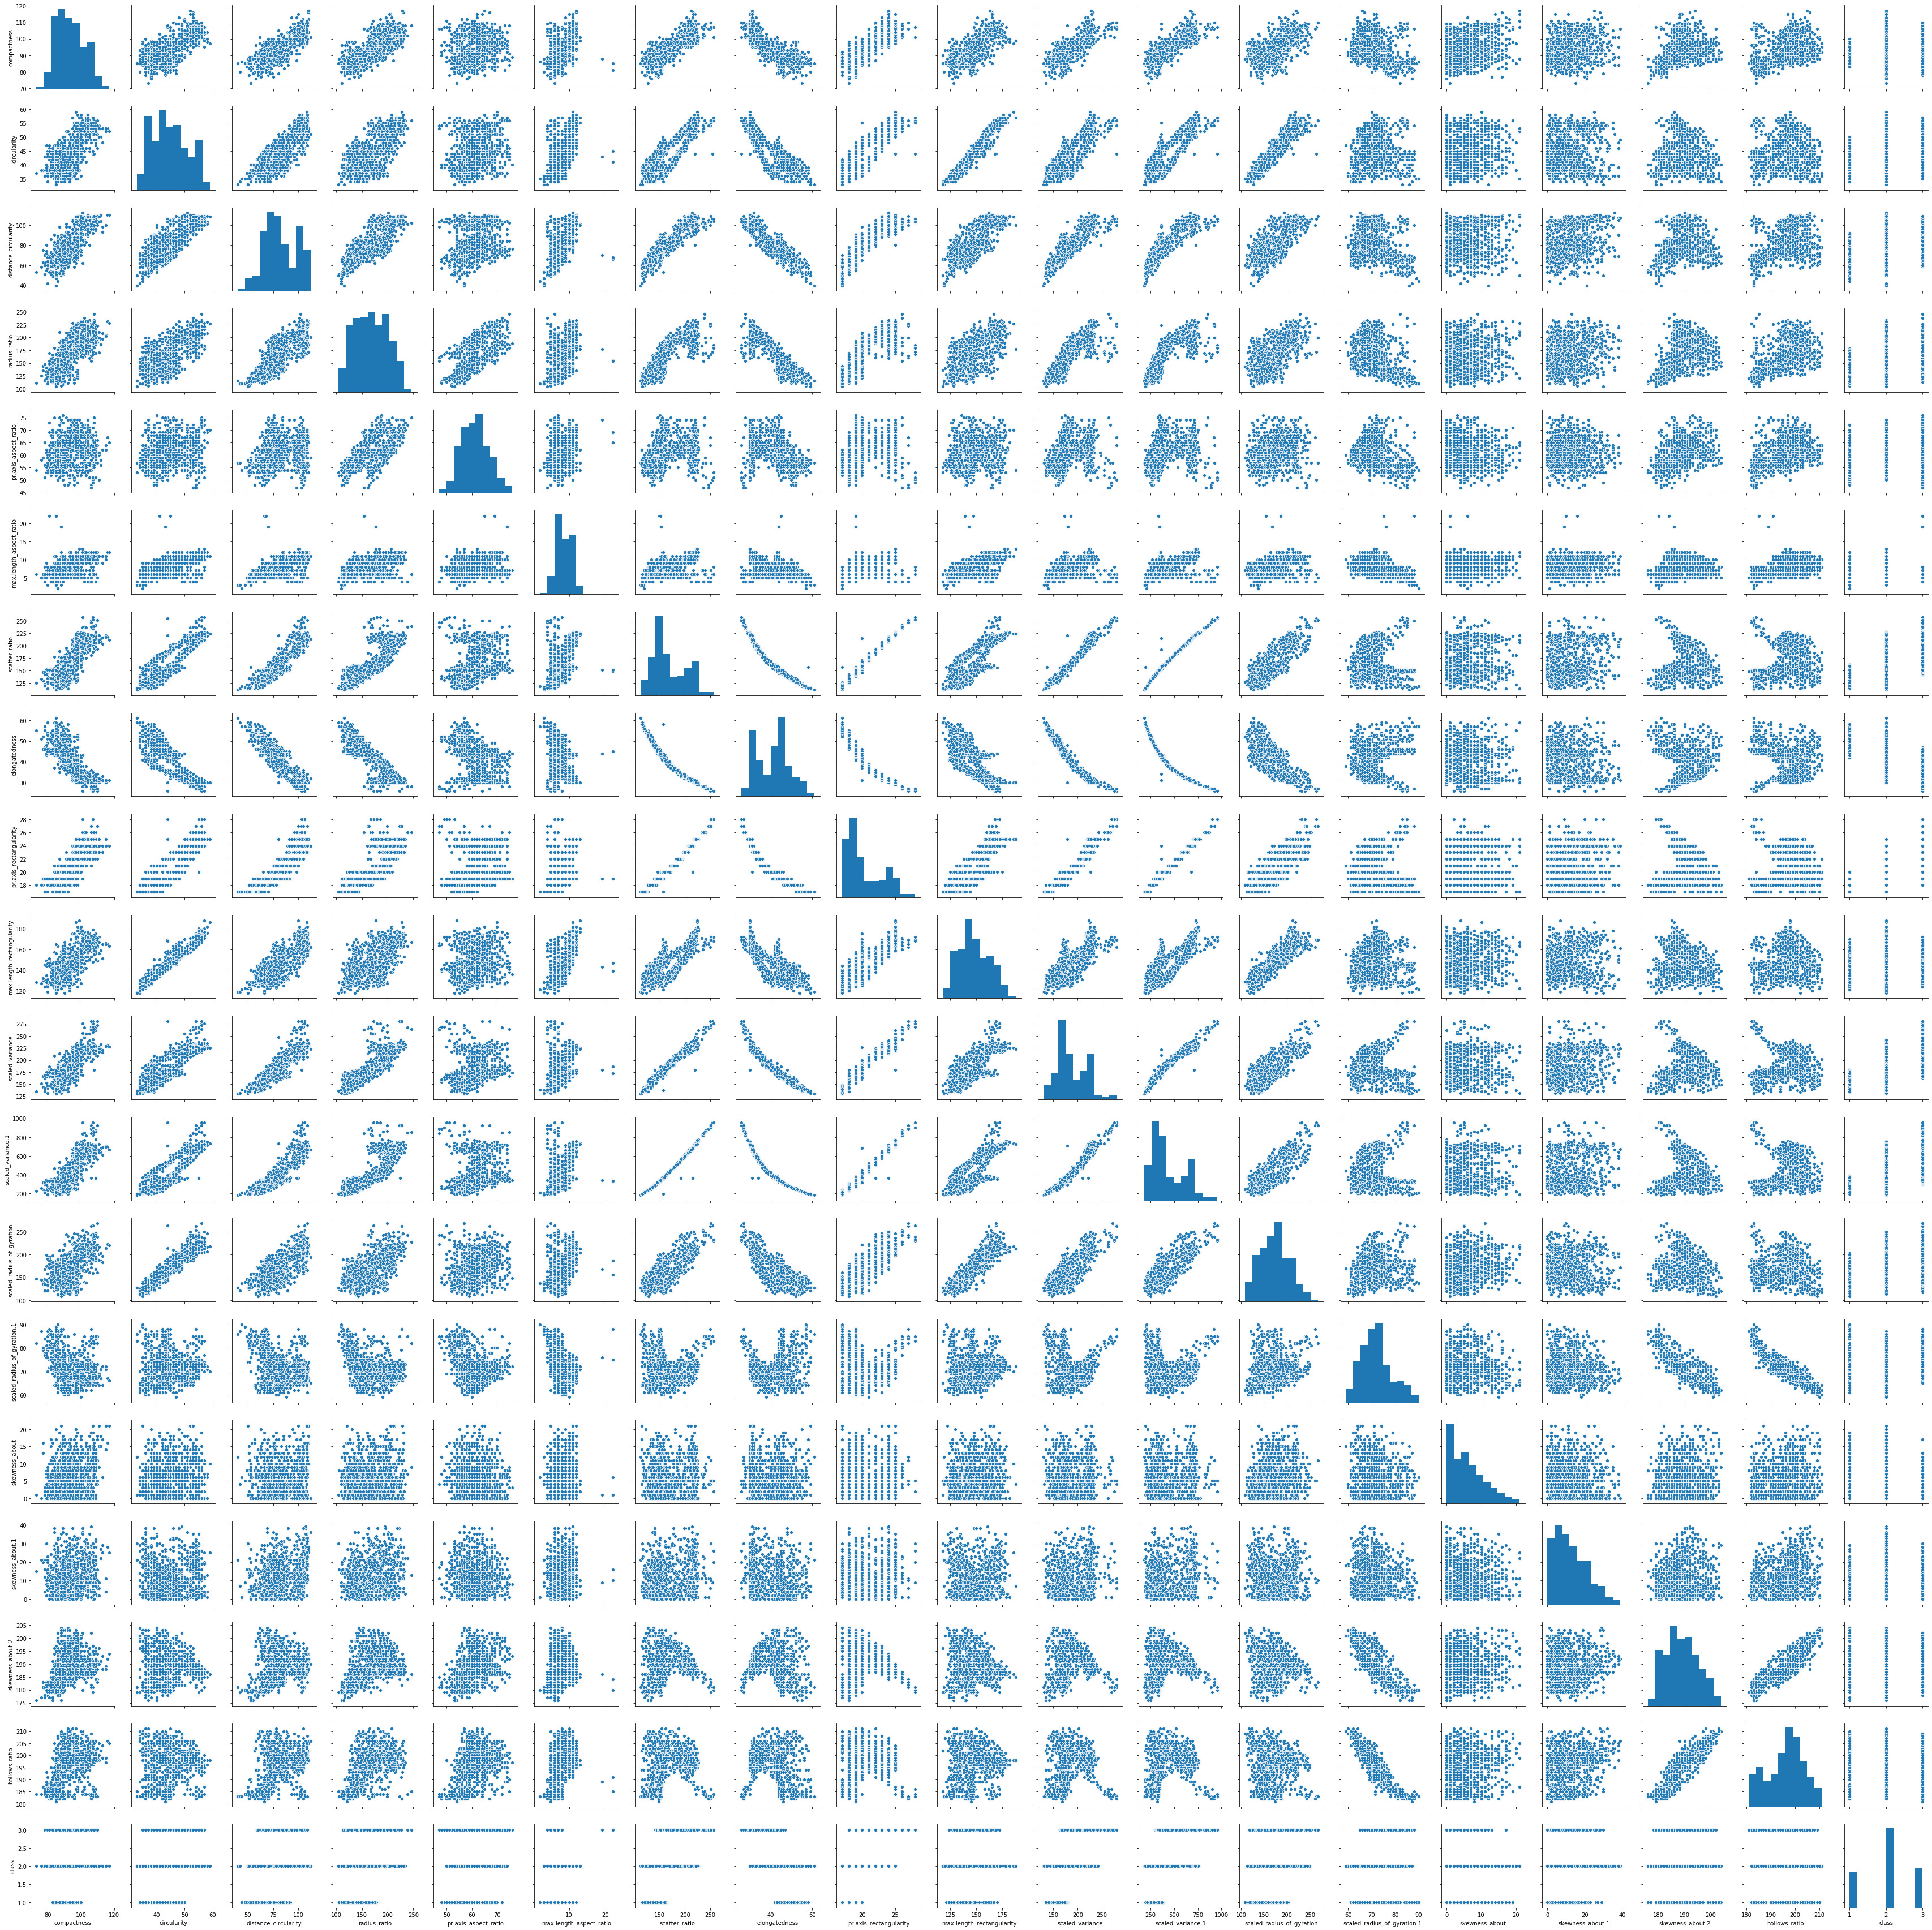

In [31]:
#we will use co-relation to find out
sns.pairplot(cData)

In [38]:
corr = cData.corr()
print(corr)

                             compactness  circularity  distance_circularity  \
compactness                     1.000000     0.681342              0.787265   
circularity                     0.681342     1.000000              0.790750   
distance_circularity            0.787265     0.790750              1.000000   
radius_ratio                    0.751520     0.648785              0.814325   
pr.axis_aspect_ratio            0.216725     0.219992              0.261043   
max.length_aspect_ratio         0.463299     0.540388              0.627453   
scatter_ratio                   0.808341     0.849447              0.907589   
elongatedness                  -0.784806    -0.820235             -0.910044   
pr.axis_rectangularity          0.809659     0.846328              0.896707   
max.length_rectangularity       0.673168     0.963278              0.771265   
scaled_variance                 0.787004     0.810586              0.887844   
scaled_variance.1               0.810769     0.83914

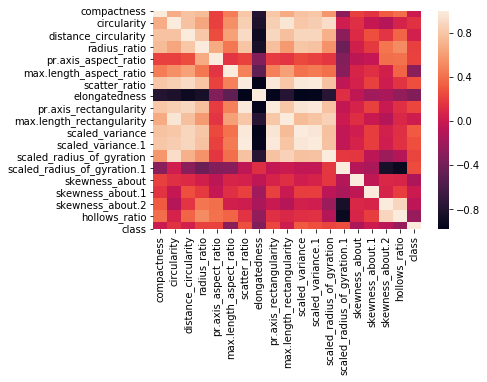

In [41]:
sns.heatmap(corr)

### 3.	Use PCA from scikit learn and elbow plot to find out reduced number of dimension

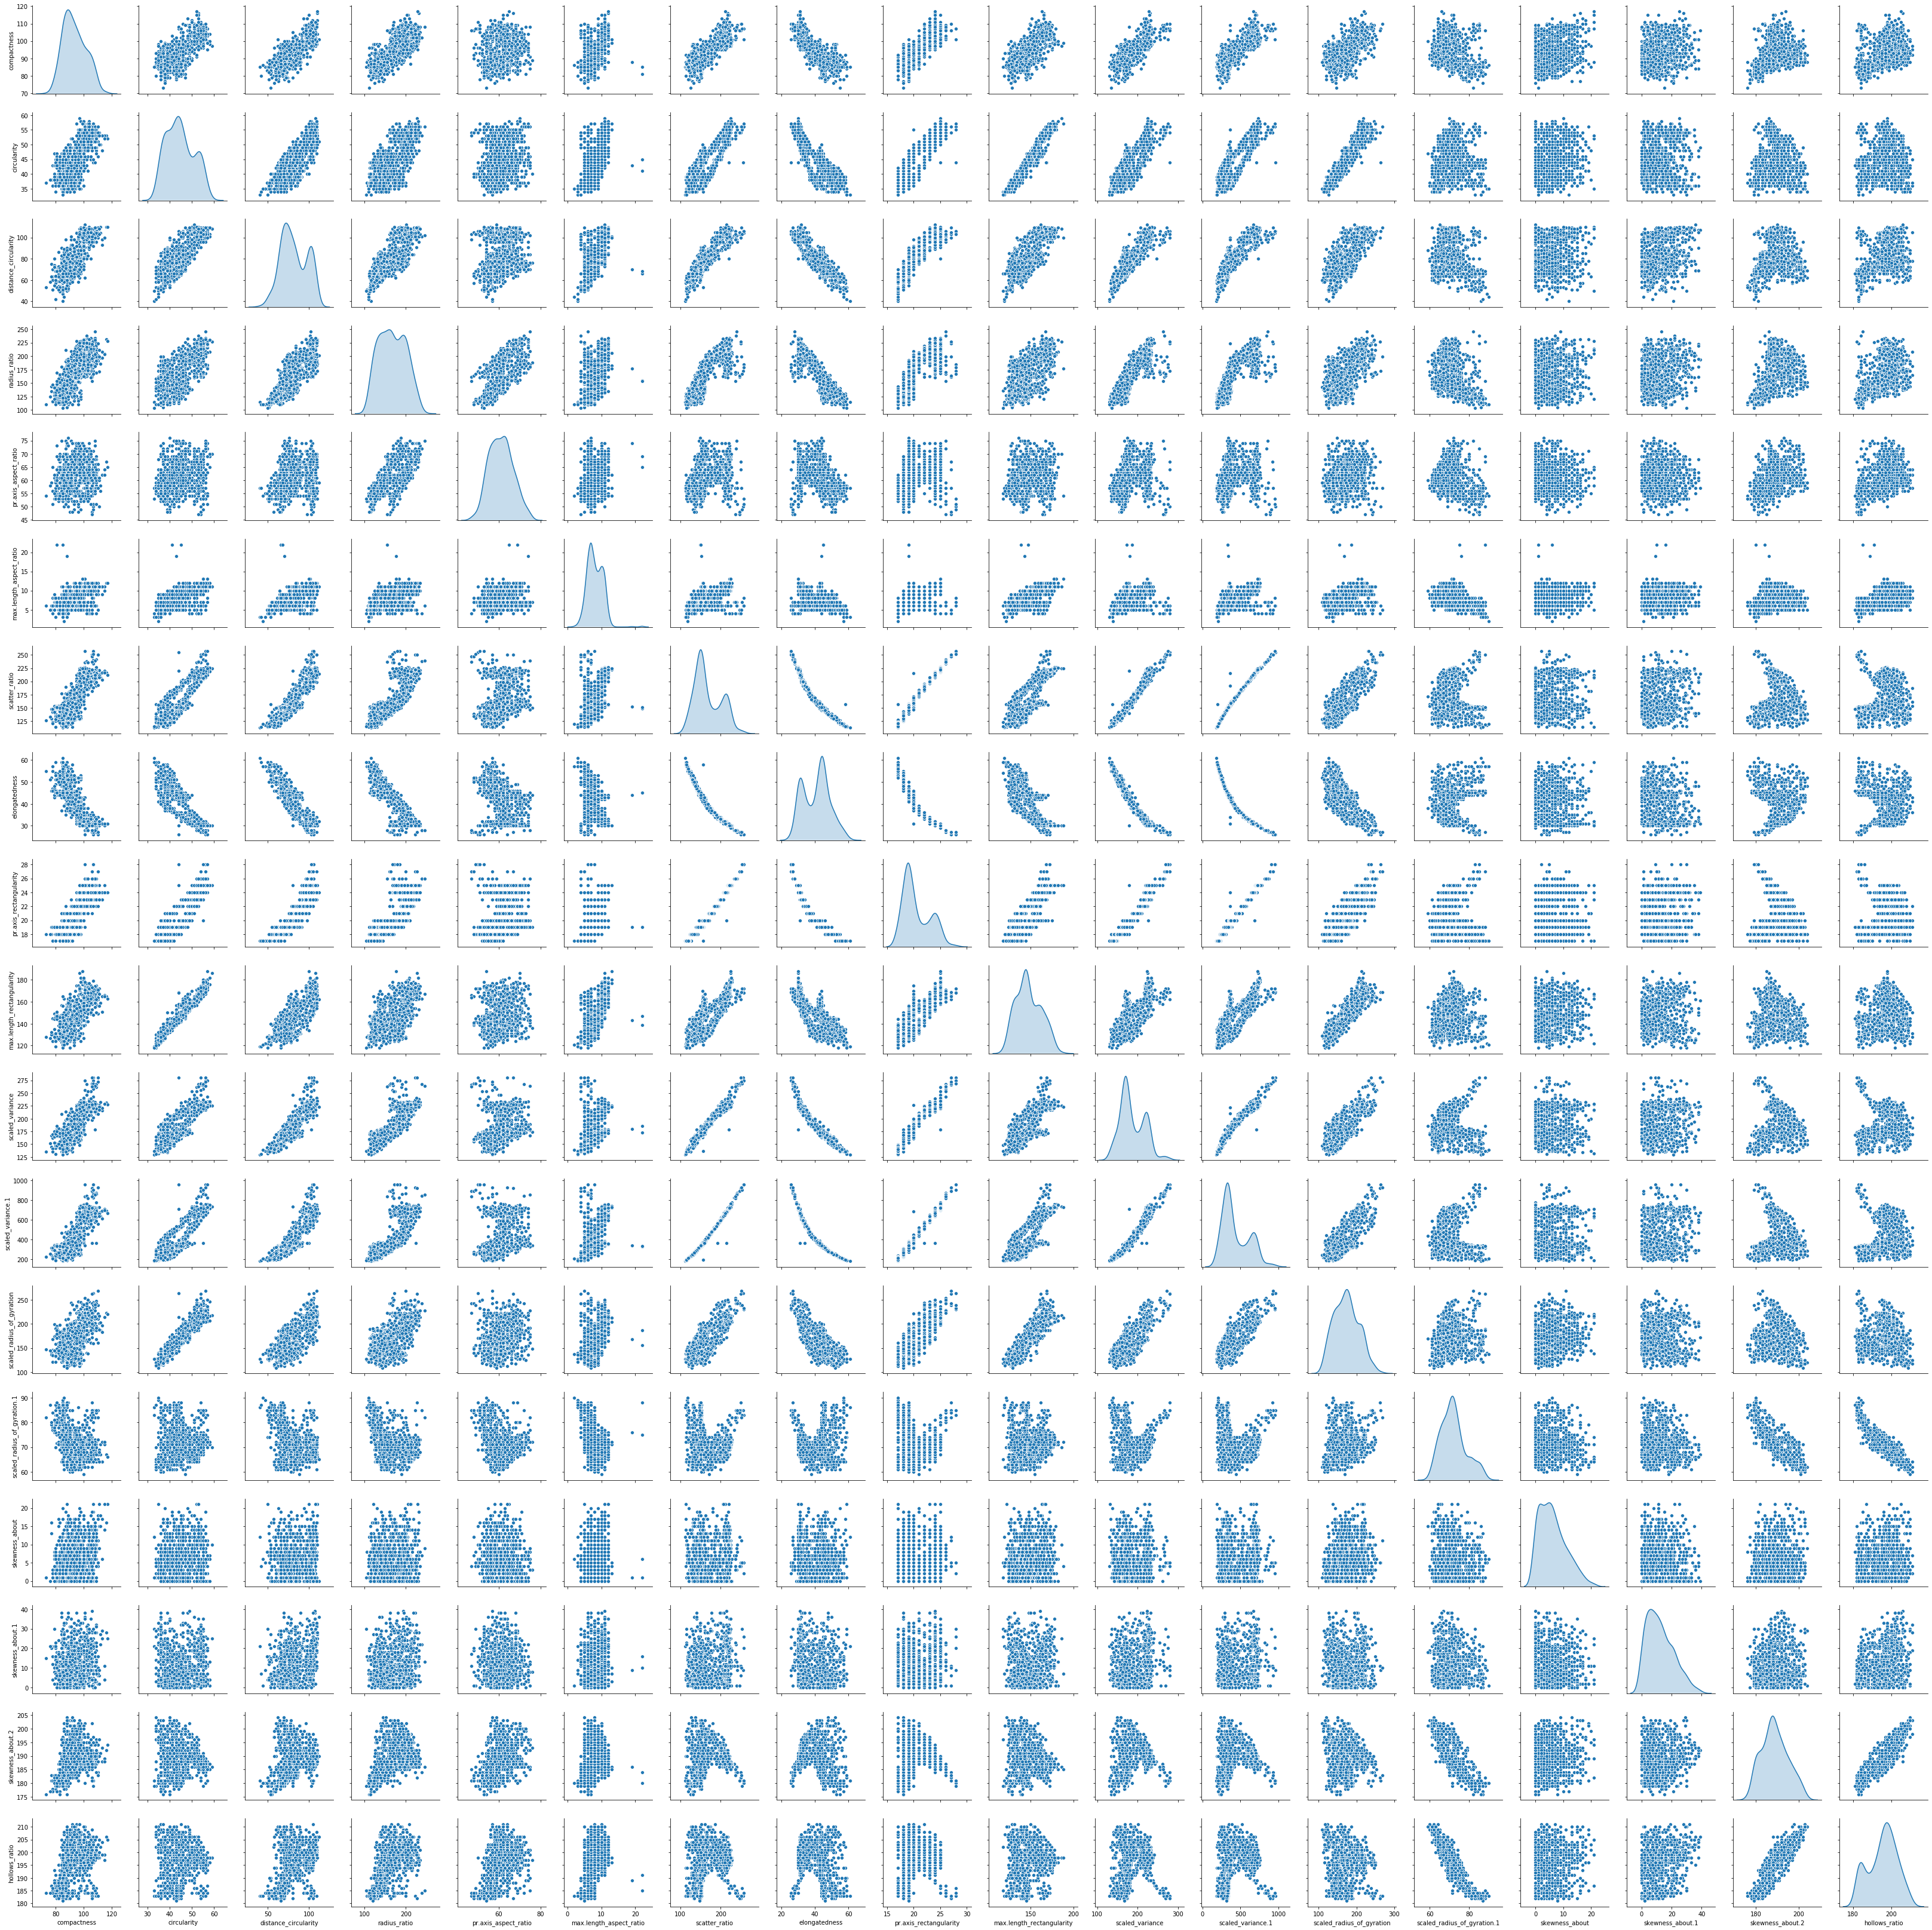

In [83]:
X=cData.drop(['class'],axis=1) #removing Class as it is a dependent variable
Y=cData['class']
sns.pairplot(X,diag_kind='kde')#checking the pairplot without class

In [84]:
from scipy.stats import zscore
XScaled = X.apply(zscore)
XScaled.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0      0.179512     0.532942              0.068123      0.325781   
1     -0.315197    -0.615790              0.131911     -0.836448   
2      1.292608     0.861151              1.535251      1.299541   
3     -0.067842    -0.615790              0.004335     -0.271039   
5      1.663639    -0.123477              1.535251      0.137311   
6      0.426867    -0.287581             -0.569758      0.168723   
7     -0.438874    -0.287581             -1.016276     -0.333863   
8     -0.933583    -1.764522             -1.271428     -0.867860   
9     -0.067842    -0.123477              1.024946     -0.019747   
10    -0.933583    -1.436313             -0.761123     -0.773625   
11    -0.438874    -1.764522             -1.016276     -0.993506   
12    -0.686229     0.204732             -0.505970      0.105900   
13    -0.562551    -0.451686              0.195700     -0.742213   
14     0.055835     0.697046             -0.187029      1.111071   
15     0.303189     1.681674              1.343887      1.048248   
16    -0.562551    -1.436313             -1.973098     -1.841620   
17     0.674221    -0.615790             -0.314606      0.922601   
18     1.292608     1.517569              1.152522      0.577074   
19     0.921576     1.845778              1.152522      1.488010   
20    -1.180938     0.368837             -0.442182     -0.459509   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0               1.918924                 0.828137      -0.195927   
1              -0.746308                 0.377420      -0.596304   
2               0.852831                 0.828137       1.189991   
3               0.319785                 0.377420      -0.750295   
5              -1.990083                -0.974729       2.668304   
6               0.675149                -0.974729      -0.473111   
7               0.675149                 0.377420      -0.965882   
8              -0.035580                -0.524013      -1.427855   
9               0.142103                 1.278853       0.450835   
10             -0.035580                 0.377420      -1.089075   
11             -1.101672                -0.974729      -1.397057   
12              1.208195                -0.974729      -0.503909   
13             -0.568626                 0.828137      -0.503909   
14              1.741241                -1.425446       0.173651   
15              0.675149                 0.377420       1.097597   
16             -1.634718                -0.974729      -1.551047   
17              1.385877                -0.974729       0.266045   
18             -0.035580                 0.828137       1.467175   
19             -0.035580                 0.828137       1.220789   
20              0.497467                -0.974729      -0.442313   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0        0.127089               -0.212374                   0.774827   
1        0.513989               -0.609189                  -0.331685   
2       -1.162579                0.978074                   0.705670   
3        0.642955               -0.609189                  -0.331685   
5       -1.936379                2.962154                   1.466398   
6        0.127089               -0.609189                  -0.331685   
7        0.900889               -1.006005                  -0.124214   
8        1.674689               -1.402821                  -1.438198   
9       -0.646712                0.581258                  -0.124214   
10       1.158822               -1.006005                  -1.230727   
11       1.674689               -1.402821                  -2.060611   
12       0.256055               -0.609189                   0.014100   
13       0.385022               -0.609189                  -0.262528   
14      -0.517745                0.184442                   0.429042   
15      -1.162579                0.978074                   1.2589

In [85]:
covMatrix = np.cov(XScaled, rowvar=False)
print(covMatrix)

[[ 1.00121507  0.68217024  0.78822181  0.75243342  0.21698852  0.46386185
   0.80932301 -0.78575974  0.81064247  0.67398599  0.78796074  0.81175375
   0.57474275 -0.29127966  0.22075084  0.15984485  0.31959319  0.39657645]
 [ 0.68217024  1.00121507  0.79171052  0.64957366  0.22025961  0.541045
   0.85047918 -0.82123179  0.84735643  0.96444884  0.81157051  0.84016678
   0.92992793  0.02955186  0.14430926 -0.01286449 -0.09028883  0.06969066]
 [ 0.78822181  0.79171052  1.00121507  0.81531437  0.26136013  0.6282153
   0.90869196 -0.91114978  0.89779661  0.77220204  0.88892309  0.89205304
   0.70207339 -0.28197451  0.10625657  0.26914753  0.1611285   0.35768519]
 [ 0.75243342  0.64957366  0.81531437  1.00121507  0.67238671  0.44497519
   0.80028668 -0.85032469  0.7751962   0.58586652  0.80720638  0.78893446
   0.55961996 -0.42786646  0.05149701  0.18807334  0.43547261  0.52425001]
 [ 0.21698852  0.22025961  0.26136013  0.67238671  1.00121507  0.1651475
   0.2245388  -0.3213513   0.19504616 

In [86]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## The Eigen values

In [87]:
print(pca.explained_variance_)

[9.84666540e+00 3.29980710e+00 1.20351991e+00 1.12794252e+00
 8.81333028e-01 6.66553473e-01 3.40154651e-01 2.28141119e-01
 1.20177988e-01 8.74702078e-02 6.49471642e-02 4.82952224e-02
 3.10425921e-02 2.71046496e-02 1.77453419e-02 1.74946687e-02
 1.03175532e-02 3.15861458e-03]


In [88]:
#Eigen Vectors
print(pca.components_)

[[-2.71309795e-01 -2.84449778e-01 -3.00909965e-01 -2.75770685e-01
  -1.07425438e-01 -1.87593661e-01 -3.09300104e-01  3.07625144e-01
  -3.06190548e-01 -2.74581919e-01 -3.02258684e-01 -3.06047174e-01
  -2.58818994e-01  6.12169850e-02 -3.85350884e-02 -5.96938582e-02
  -4.85531491e-02 -9.76630686e-02]
 [-8.73254992e-02  1.45592977e-01 -3.81921704e-02 -1.94070827e-01
  -2.48378425e-01 -6.89838664e-02  7.77590595e-02 -1.88827871e-02
   8.95604107e-02  1.36026776e-01  7.27699345e-02  8.18148047e-02
   2.18605050e-01  5.02566961e-01 -2.76841188e-02 -9.58106036e-02
  -5.06808273e-01 -5.03512924e-01]
 [-4.12525682e-02 -2.01746727e-01  7.54331346e-02  4.15565569e-02
  -9.59906665e-02 -1.13390083e-01  1.09343480e-01 -9.14627983e-02
   1.06986751e-01 -2.06024846e-01  1.38921058e-01  1.08958069e-01
  -2.14106558e-01  6.80613078e-02 -5.48801579e-01  6.81307935e-01
  -7.28491258e-02 -3.97299160e-02]
 [ 1.45446164e-01 -2.84005677e-02  1.04297062e-01 -2.40023782e-01
  -6.06286399e-01  2.47207379e-01  7.

In [89]:
#Percentage of variation explained by each eigen vector
print(pca.explained_variance_ratio_)

[5.46373087e-01 1.83100138e-01 6.67810736e-02 6.25874253e-02
 4.89035249e-02 3.69858083e-02 1.88745468e-02 1.26591249e-02
 6.66845226e-03 4.85355859e-03 3.60379694e-03 2.67981176e-03
 1.72249550e-03 1.50398642e-03 9.84655904e-04 9.70746517e-04
 5.72501770e-04 1.75265628e-04]


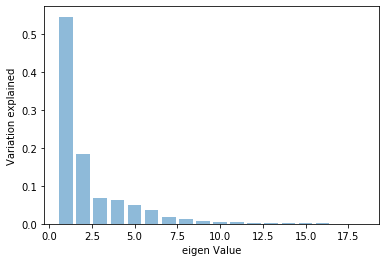

In [90]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

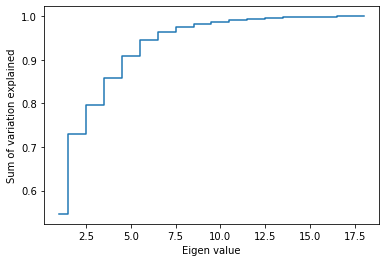

In [91]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Sum of variation explained')
plt.xlabel('Eigen value')
plt.show()

## Dimensionality Reduction

In [93]:
# 6dimension seems reasonable as they can explain 95%
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_)
Xpca6 = pca6.transform(XScaled)

[[-0.27130979 -0.28444978 -0.30090997 -0.27577068 -0.10742544 -0.18759366
  -0.3093001   0.30762514 -0.30619055 -0.27458192 -0.30225868 -0.30604717
  -0.25881899  0.06121698 -0.03853509 -0.05969386 -0.04855315 -0.09766307]
 [-0.0873255   0.14559298 -0.03819217 -0.19407083 -0.24837842 -0.06898387
   0.07775906 -0.01888279  0.08956041  0.13602678  0.07276993  0.0818148
   0.21860505  0.50256696 -0.02768412 -0.0958106  -0.50680827 -0.50351292]
 [-0.04125257 -0.20174673  0.07543313  0.04155656 -0.09599067 -0.11339008
   0.10934348 -0.0914628   0.10698675 -0.20602485  0.13892106  0.10895807
  -0.21410656  0.06806131 -0.54880158  0.68130793 -0.07284913 -0.03972992]
 [ 0.14544616 -0.02840057  0.10429706 -0.24002378 -0.6062864   0.24720738
   0.0007455   0.07045636  0.02592699  0.04664051 -0.05613655 -0.00377621
  -0.07124901 -0.12270423  0.52547064  0.40616268 -0.02632336  0.08924063]
 [-0.16210669  0.13135892  0.07850656 -0.126098   -0.0678208   0.70707553
  -0.09179969  0.08608371 -0.087243

In [94]:
Xpca6

array([[-0.62654039, -0.58577066, -0.45049463, -0.78396072,  0.92980158,
         1.71015036],
       [ 1.50034631, -0.37195055, -0.2246479 ,  1.21586192,  0.40474241,
         0.04414286],
       [-3.99572222,  0.35280176, -1.18995107,  0.17796041, -0.78158168,
         0.74487679],
       ...,
       [-5.21187096,  0.04132215, -0.4750285 , -1.05047909,  1.16873481,
        -0.35097729],
       [ 3.26213403, -1.18562334,  1.93707445,  0.35019212,  0.46610977,
        -0.04887729],
       [ 4.97702519,  0.26340332,  1.28893271,  0.2572465 ,  0.08278877,
        -0.40170984]])

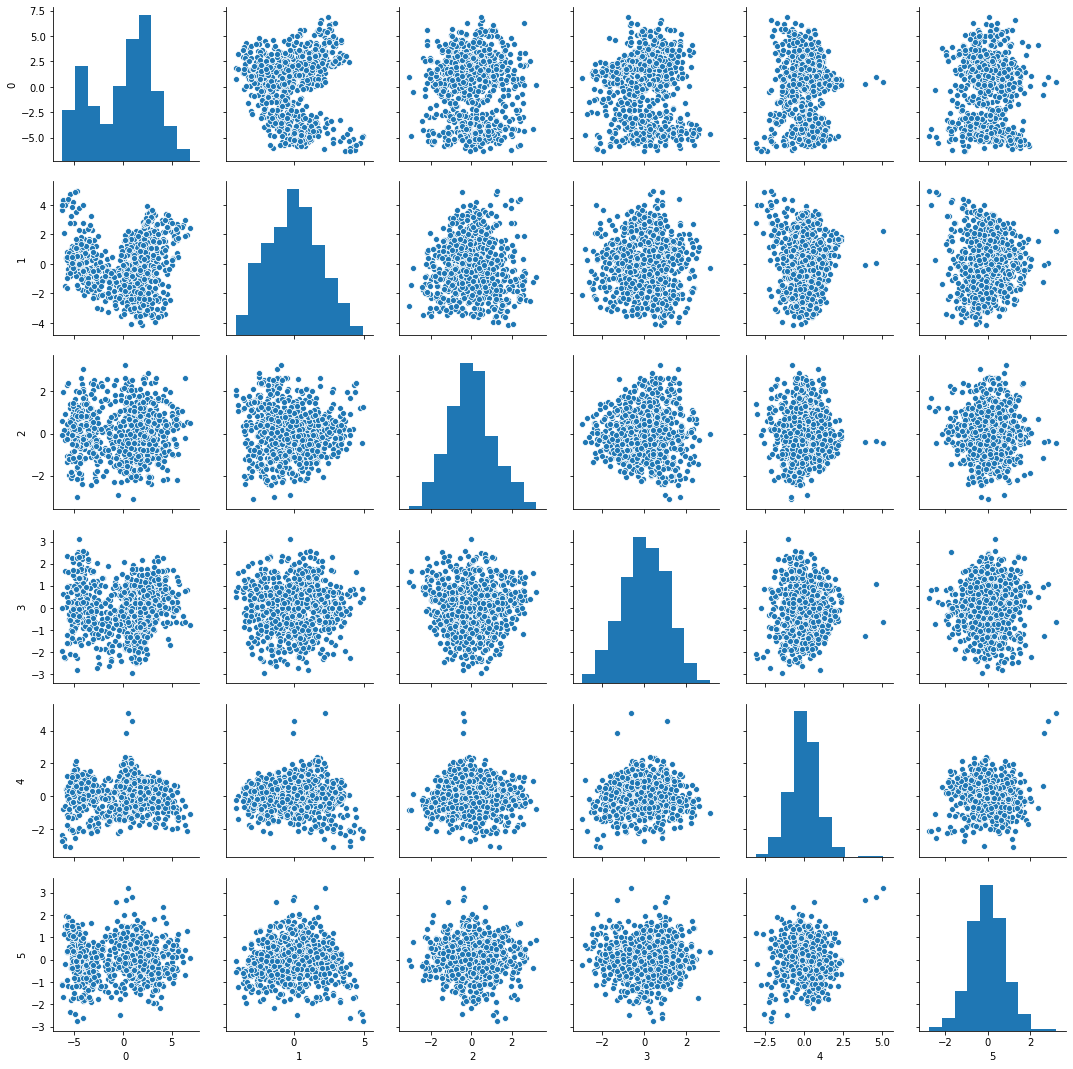

In [95]:
sns.pairplot(pd.DataFrame(Xpca6))

In [96]:
#Linear Regression
regression_model = LinearRegression()
regression_model.fit(XScaled,Y)
regression_model.score(XScaled,Y)

0.6579986643465887

In [97]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca6,Y)
#regression_model.score(Xpca6,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
#regression_model.score(Xpca6,Y)

In [99]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
diab_model = GaussianNB()
diab_model.fit(XScaled,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [102]:
diab_train_predict = diab_model.predict(XScaled)
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y,diab_train_predict)))
print()

Model Accuracy: 0.6262



In [116]:
from sklearn.svm import SVC
svc_model = SVC(C=100000, gamma = 0.001, kernel = 'rbf').fit(XScaled, Y)
y_pred_svc = svc_model.predict(XScaled)
print("Accuracy on training data: {:.02f}%".format(metrics.accuracy_score(Y,svc_model.predict(XScaled))*100))
print("Accuracy on testing data: {:.02f}%".format(metrics.accuracy_score(Y,y_pred_svc)*100))
print("Classification Report")
print(metrics.classification_report(Y,y_pred_svc))

Accuracy on training data: 100.00%
Accuracy on testing data: 100.00%
Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       210

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

